# Make it classy

Hey there, this lesson is about **Object Oriented Programming**. Here I wanna give you an intuition about what it is and the way to use it in Python.

You are already familiar with functions, are you ?
Functions are meant create **blocks of code** in order to use it many times at different places in your code.

In [ ]:
def say_hello(*names):
    for name in names:
        print ("Hello {}".format(name))
        
say_hello("Anne-Sophie", "Bob", "Wang Xiaoming", "Mohammed")

Functions are difficult to design because you need to make many decisions:
- What should be their return value
- What should be their parameters
- What should be inside or outside the function
- What do I want to do anyway ? (yes, yes, sometimes you end up not being able to answer that question in a "not confusing way") 


It takes a lot of thinking and experience to have a good *intuition* about these questions.

There is no shortcut to that, good software engineering requires practice trials and a lot of errors before one can make things all right.

As a matter of fact, "object oriented programming" is actually very likely to make things even more *complicated* if you don't use it right.

However, if you do understand the right way to design your code. It is a very powerful tool.

Let me give you a "bonus advise": 

*When facing a topic that seems complicated ensure you clearly set up in your mind what is the problem we are trying to solve.*


## Classify your code

As a newbie, you may not feel like you need that. But...

When you do coding, you may spend a lot of time writing **tens of functions**. You *re-write correct and move* your functions *so many times* that you end up *forgetting* about "*big picture*" of what you are trying to do.

First step to understand object oriented programming is to *feel the need* to **classify** your functions.
This is (partly) what classes are about.

*(You may argue that you can do the same with "modules" (write code in different files... you know...). You make a point, but as you will see classes do more than that, and even if not, sometimes modules get so big that they need to be subdivided...)

Example:
In few weeks (or months) you may wanna start coding a machine learning project, even before starting to code here is how I would **classify** my functions:

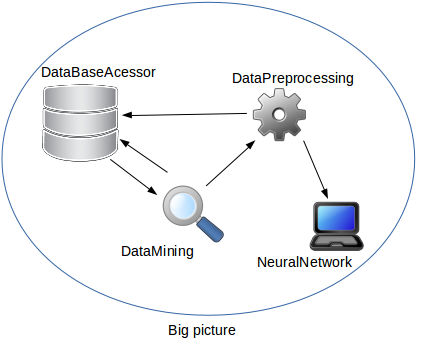

In [ ]:
class CustomData:
    """Some class that represent structured the data we may want to put in our database"""
    pass

class DataBaseAccess:
    """Group all the functions that "access" your database here
    Many existing tools are able to query a database, 
    but here you will "pre-write" the requests you will often need in your application
    """
    # Write a lot of smartly designed code here[...]
    pass

class DataMining:
    """Group all the functions that "mine data" here.
    data mining means filtering and transforming raw data downloaded on the web into valuable information
    """
    # Write a lot of smartly designed code here[...]
    pass


class DataPreprocessing:
    """Group all the functions that do your preprocessing here.
    preprocessing means transforming your "mined data" into inputs for your neural network
    """
    # Write a lot of smartly designed code here[...]
    pass


class NeuralNetwork:
    """Group all the functions that do your machine learning here.
    follow the rest of this course carefully to understand this part
    """
    # Write a lot of smartly designed code here[...]
    pass

Once you have carefully designed your classes and functions that do "the specialized jobs", well designed code should allow you to write a short code that contains "**the big picture**".

In [ ]:
# construct an "object" of class DataBaseAccess (don't worry I will explain it later)
databaseAccessor = DataBaseAccess()

if (databaseAccessor.doIhaveNewData() is True): # read the data to see if I need to read you data
    # use the "databaseAccessor" to download freshly processed data 
    my_new_data = databaseAccessor.readTheNewData()

#create a miner and use it to mine new data
dataMiner = DataMining()
mined_data = dataMiner.mineData(my_new_data)

#store the mined data so I don't have to re-mine it again later (mining data is a long operation)
databaseAccessor.storedMinedData(mined_data)

#preprocess that new data
dataPreprocessor = DataPreprocessing()
preprocessed_data = dataPreprocessor.mineData(mined_data)


neuralNetwork = NeuralNetwork()
neuralNetwork.configure() #TODO configure your neural network setting the number of neurons and layers for instance

neuralNetwork.train(preprocessed_data)

#now the model is trained ! 

This quick piece of code may look confusing to you if you are not familiar with "classes" and "objects". But keep reading you are soon gonna be an expert at this !

But that's cool is it ? It just took me few lines to write "the big picture" of some bad ass project (I recommend you spend a minute reading it, it's actually not that bad...).

Don't celebrate too quickly however : I have good and bad news.
- Bad news is: the big picture is always the **easiest** thing to design, because it is the way our mind thinks. You are gonna spend most of your time and efforts writing the code inside the classes that make the "big picture look easy".
- Good news is: if your *design is good* you may ask *someone else* to write one of the classes for you. It also helps you find the right search terms for google ;)
- Other good news: it is alright to do easy things first, actually good software design requires that your code stay tidy in your mind and in the mind of people who mayread your code

## Classes contain functions, but also variables


Let's go back to the example of the class DataBaseAccess. This class is a "toolbox" or a "*list of functions*" we use to read and write some database.

But these functions have some "common information" to share such as:
- database name
- database ip address

We gave the example of the functions: "doIhaveNewData", "readTheNewData", "storedMinedData".
These three functions read/write the data on the same database.

The may be structured like this:

In [ ]:
class DataBaseAccess:
    """Group all the functions that "access" your database here
    Many existing tools are able to query a database, 
    but here you will "pre-write" the requests you will often need in your application
    """
    def __init__(self):
        self.__database_name = "MyOverkillMachineLearning"
        self.__database_ipadress = "localhost"
        self.__database_accessPort = 1521 
        #If you don't know why a database have an IP address + port, don't worry about that...
        #Focus on the code design, keep having the "big picture"
    
    def doIhaveNewData(self):
        pass
    
    def readTheNewData(self):
        pass
    
    def storedMinedData(self, mined_data):
        pass

In [ ]:
databaseAccessor.doIhaveNewData()
databaseAccessor.storedMinedData(mined_data)

Notice we see that mysterious "**self**" many times in this code. I'll explain it later, for now act as if it did not exist.

Notice also I have a function \__init__ that "initialises" my class with the information I want to provide. The values of the variables (we give to "self") are stored *inside the class instance*.


The point here is to understand that we want some "**shared information**" we set up "**once**" in such way that all the functions *inside the class* can access it.

If you don't see why do you need that. Imagine would it look like otherwise. Everytime you call your function:


In [ ]:
doIhaveNewData("MyOverkillMachineLearning", "localhost", 1521)
#[...]
storedMinedData("MyOverkillMachineLearning", "localhost", 1521, mined_data)

How do you like it ?

Even if you like coding I am pretty sure you won't like *repeating* the typing of the same values again and again. 

Even if you copy paste and spend few effort on that repetition I do believe that it is easier to read when there is less text.

The code with classes is **simpler and makes more sense**.

Classes are a set of functions grouped together.

But these "grouped" functions may share some information. We usually store this information in **variables**.

So the variables you write inside your class are **owned** by your class (instance). These variables belong to the functions of the class and only to them. Classes give a **context** to your functions.

## Classes vs Objects

That's good, we have a class DataBaseAccessor that contains functions to read and write functions like it was easy (from the point of view of the "big picture").

All the complicated stuff about database are wrapped inside that class.

But what if I had many databases and I want to use these same functions to access them? The only thing I want to change is the databases name ip and access port.

I don't want to modify my existing class I still need my first database *I want both*.

This is how you understand the difference between class and object. 

Creating an object of class DataBaseAccessor consists in using its **same functions**, with the **same variables**, but **having different values**.

In [ ]:
class DataBaseAccess:
    def __init__(self):
        """Configure with some default parameters"""
        self.__database_name = "MyOverkillMachineLearning"
        self.__database_ipadress = "localhost"
        self.__database_accessPort = 1521
        pass
    
    def __init__(self, databaseName, ipadress, accessPort):
        """Configure with some other parameters"""
        self.__database_name = databaseName
        self.__database_ipadress = ipadress
        self.__database_accessPort = accessPort

# Here is how it looks when we use that class

my_default_database = DataBaseAccess() #variable that access default database MyOverkillMachineLearning
my_other_database = DataBaseAccess("MySecretDatabase", "localhost", 1522) #variable accessing MySecretDatabase


Here we go, we have code two variables of "type" DataBaseAccess (yes a class is in some way a variable type). 

If you want to sound like a true developper you can say: **my_default_database** and **my_other_database** are "**instances**" of class DataBaseAccess (which actually means exactly the same).

We can also say **my_default_database** and **my_other_database** are **objects** of **class** DataBaseAccess.
They share the same functions, but when you call a function from on object it will automatically pass the parameter of that object:

In [ ]:
my_default_database.readTheNewData() # read the data from database "MyOverkillMachineLearning"
my_other_database.readTheNewData() # read the data from database "MySecretDatabase"

### Some important vocabulary:

A **class** is a **type** while **objects** are **variables** of that **type**.

Now you know why it is called "**Object** Oriented Programming"

Just a quick remark: you may have noticed that we've got "two \__init\__ functions". They have the **exact same name** but they differ by the number of parameters you pass them. 

Python is able to recognize which function you mean to call just by counting the number of parameters. 
Declaring many functions with the same name but with a different number of parameters is called **overloading**.

The **\__init__** function is a **python reserved function name** that (almost) always appears in class declaration. **It is automatically called just after an "instance" of that class is created**. 

Now it's time to talk about that "mysterious **self keyword**".

## Point to my **self**

Maybe you already guessed what is that "self" that appears so many times in the class definition. If you pay a close look you may even notice that it is the first parameter of every function. 

And if you look even more careful you may also notice that this "self" has dissapeared when we call the function.

In a way it hasn't really disapeared, it **transformed** ! Have a look !
It is actually the **"databaseAccessor" that became "self"**!

Let's have a better intuition on this.
You remember the objects databaseAccessor and my_other_database are both instances of the same class called DataBaseAccess do you ?

They have the same functions but inside the functions the values of \__database_name is different.

When python is inside your function doIhaveNewData, it kind of need some help "to remember" which object it is dealing with. The "self" is that reminder. It is some sort of "pointer", pointing to the memory containing the values of the variables for the current object.

The very fact of writing "**[your object name].**" just before the name of the function is gonna give a value to "self", and that value is [your object].

# Make it magic

How would you do it if you were asked to add that feature on your class : "I want to be able to add new data on that database."

There is the obvious way and the magic way.

## The obvious way

I hope it is obvious to you. The right way to do that, is of course to add a new function to the class DataBaseAccess 

In [ ]:
class CustomData:
    """Some class that structures the data we may want to put in our database"""
    pass


class DataBaseAccess:
    """Same as above"""
    # all the functions I mentioned before have not changed
    def addData(self, newData):
        #write code to add newData in the database
        pass
        
#Now let's show how to use it.
newData = CustomData() # for now no data, it is just an example...
my_database = DataBaseAccess()
my_database.addData(newData)

Pretty straightforward is it ?
(I am talking about the code design of course, you may still spend a lot of effort writing a class to "contain" data and put it in the variable "newData" instead of the "empty CustomData class"...)

But how would you like to write that: 

Of course for now it does not work. Python do not know what does that mean to add a CustomData into a DataBaseAccess.
You need to be aware that this is what this statement is asking.

But python offers some magic feature to make it work:

## The magic way

In [ ]:
class CustomData:
    """Some class that structures the data we may want to put in our database"""
    pass


class DataBaseAccess:
    """Same as above"""
    # instead of addData I want to write this
    def __add__(self, newData):
        # If I try to add something that is not a CustomData make the program crash
        if isinstance(newData, CustomData) is False:
            raise Exception("type {} does not fit, expect a CustomData".format(type(newData)))
        #write code to add newData in the database

# And now you can do magic !
my_database = my_database + newData #calls the function __add__

The only thing that had changed between this example and the previous is the name of the function: it is *\__add\__* instead of *addData*.

The name \__add\__ is a *reserved* name, that means that giving that name to a function inside a class has a *special meaning*, and that *special meaning* is what we call **magic**.

The magic here is that you are telling the python interpreter what is the way to add something to your object.
In other terms, if you define that function python will replace this:
* my_database = my_database + newData

By this:
* my_database.\__add\__(newData)

I am not making the whole list of every magic function there is. There are magic functions for most operators you can imagine: '=', '-', '[]', '*', etc... Just google it if you need it. 

But do never forget to keep in mind that you only want to do things that **have some meaning** to you and your colleagues. 

## Be careful with magic

But there are few things I want to warn you about:
- magic functions create an implicit way of calling a function. Implicit means that **your function call does not look like calling a function**. **It is up to you to master what your code is doing**. Otherwise you will have painful time debugging problems.
- the magic function does not care if you try to add a number a string or anything else. But does that mean anything to "add 5" into your database like this: 

my_database = my_database + 5 # seriously ?!

**If you are not able to tell the meaning of something, the code is not gonna make the meaning for you**. You are the smart humain brain, don't rely on the machine to make meaning of things instead of yourself, otherwise you will be disapointed.

## Crash my code on purpose
That is actually the reason why I added that code: 

In [ ]:
# If I try to add something that is not a CustomData make the program crash
if isinstance(newData, CustomData) is False:
    raise Exception("type {} does not fit, expect a CustomData".format(type(newData)))

When I write the function \__add\__ I mean to add proper data in my database, I don't want to pollute it with nonsense ! 
On that point I plan to design a class CustomData who is responsible for data quality and format, and I want to add only that verified data in my database.

If me or someone else try to add something wrong, on purpose or not, I raise an Exception, which will probably cause the program to crash.

I do want you to wonder: **Why do I crash my program on purpose ?** I though the job is to avoid the program crashing...

That's a great question !
When you do a lot of programming you realize that a program who crashes is actually "easy to debug" because there are many ways to find the exact place where it crashed, and fix it !
Of course it is better if everything is fine and work good... 

But there is something that is way **much worse** than a program which crashes: a program that look like it work but that is actually having a wrong behaviour.

If someone trys to add "5" in my database, that does not mean anything to me. So I want it to crash, so that we find out quickly that there is something wrong.

This is what this code is doing: it checks that my data has the right format that I defined in CustomData. 
I want the newData to be an object of type CustomData and nothing else.